In [88]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
import seaborn as sns                                    #importing the necessary libraries

In [89]:
df = pd.read_excel("house_price_data_7000.xlsx")

In [90]:
df.sample(10)

,Order,Brüt m²,Net m²,Oda Sayısı,Banyo Sayısı,Binadaki Kat Sayısı,Bulunduğu Kat,Bina Yaşı,Isıtma Tipi,Mobilya Durumu,...,Kimden,Krediye Uygun,Location Lat,Location Lon,Location1,Location2,Location3,Aidat,Takasa Uygun,Price
3852,3853,180,160.0,3+1,2,4,Kot 3,16-20 arası,Kombi (Doğalgaz),Eşyasız,...,Danışman,Evet,40.996945,28.913514,Telsiz,Zeytinburnu,İstanbul,20.0,NaN,750000
3050,3051,100,95.0,2+1,1,5,3,4,Kombi (Doğalgaz),Eşyasız,...,NaN,Evet,41.100328,28.859057,Sultançiftliği,Sultangazi,İstanbul,NaN,Evet,335000
4533,4534,95,85.0,2+1,1,5,Bahçe katı,0,Kombi (Doğalgaz),Eşyasız,...,Danışman,Evet,41.014874,28.635744,Cumhuriyet,Beylikdüzü,İstanbul,15.0,Evet,119500
4192,4193,95,90.0,2+1,1,3,1,4,Kombi (Doğalgaz),Eşyasız,...,NaN,Evet,41.036145,28.867569,Çınar,Bağcılar,İstanbul,25.0,NaN,290000
4507,4508,222,163.0,4+1,2,10-20 arası,6,1,Klima,Eşyasız,...,Danışman,Evet,41.116722,28.770566,Kayabaşı,Başakşehir,İstanbul,0.0,NaN,1625000
731,732,65,60.0,1+1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,Hayır,41.030161,28.880368,Gençosman,Güngören,İstanbul,NaN,NaN,180000
2283,2284,110,100.0,2+1,1,5,3,0,Kombi (Doğalgaz),Eşyasız,...,İnşaat Geliştirici,Evet,40.985022,28.649734,Kavaklı,Beylikdüzü,İstanbul,25.0,Evet,190000
5598,5599,65,55.0,1+1,1,5,5,3,Kombi (Doğalgaz),Eşyasız,...,Danışman,Evet,40.959682,29.214821,Fatih,Sancaktepe,İstanbul,40.0,Evet,150000
3909,3910,210,150.0,4+1,2,20 ve üzeri,6,6-10 arası,Merkezi Sistem,Eşyasız,...,NaN,Evet,40.970310,29.094113,Kozyatağı,Kadıköy,İstanbul,0.0,NaN,1750000
4176,4177,98,90.0,2+1,1,5,2,6-10 arası,Kombi (Doğalgaz),Eşyasız,...,Danışman,Evet,41.095839,28.892919,Yunus Emre,Sultangazi,İstanbul,NaN,Evet,340000


In [91]:
df.shape

(7039, 24)

# Feature Engineering

In [92]:
df.columns

Index(['Order', 'Brüt m²', 'Net m²', 'Oda Sayısı', 'Banyo Sayısı',
       'Binadaki Kat Sayısı', 'Bulunduğu Kat', 'Bina Yaşı', 'Isıtma Tipi',
       'Mobilya Durumu', 'Kullanım Durumu', 'Yapının Durumu', 'Konut Şekli',
       'Kira Getirisi', 'Kimden', 'Krediye Uygun', 'Location Lat',
       'Location Lon', 'Location1', 'Location2', 'Location3', 'Aidat',
       'Takasa Uygun', 'Price'],
      dtype='object')

In [93]:
df.rename(columns={
    "Brüt m²":"Brüt_m2",
     "Net m²":"Net_m2"                  
},inplace = True)

In [94]:
df.rename(columns = lambda x : x.replace(" ","_"),inplace = True)

In [95]:
df.columns  # i changed the names of some columsn becasue it is easier to work with data in this way.

Index(['Order', 'Brüt_m2', 'Net_m2', 'Oda_Sayısı', 'Banyo_Sayısı',
       'Binadaki_Kat_Sayısı', 'Bulunduğu_Kat', 'Bina_Yaşı', 'Isıtma_Tipi',
       'Mobilya_Durumu', 'Kullanım_Durumu', 'Yapının_Durumu', 'Konut_Şekli',
       'Kira_Getirisi', 'Kimden', 'Krediye_Uygun', 'Location_Lat',
       'Location_Lon', 'Location1', 'Location2', 'Location3', 'Aidat',
       'Takasa_Uygun', 'Price'],
      dtype='object')

In [96]:
df.dtypes

Order                    int64
Brüt_m2                  int64
Net_m2                 float64
Oda_Sayısı              object
Banyo_Sayısı            object
Binadaki_Kat_Sayısı     object
Bulunduğu_Kat           object
Bina_Yaşı               object
Isıtma_Tipi             object
Mobilya_Durumu          object
Kullanım_Durumu         object
Yapının_Durumu          object
Konut_Şekli             object
Kira_Getirisi          float64
Kimden                  object
Krediye_Uygun           object
Location_Lat           float64
Location_Lon           float64
Location1               object
Location2               object
Location3               object
Aidat                  float64
Takasa_Uygun            object
Price                    int64
dtype: object

In [97]:
df.isna().sum()      

Order                     0
Brüt_m2                   0
Net_m2                   80
Oda_Sayısı                2
Banyo_Sayısı              1
Binadaki_Kat_Sayısı     296
Bulunduğu_Kat           253
Bina_Yaşı               263
Isıtma_Tipi             299
Mobilya_Durumu          685
Kullanım_Durumu         351
Yapının_Durumu         2607
Konut_Şekli            1388
Kira_Getirisi          1766
Kimden                 2765
Krediye_Uygun             0
Location_Lat             55
Location_Lon             55
Location1                 0
Location2                 0
Location3                 0
Aidat                  2276
Takasa_Uygun           5277
Price                     0
dtype: int64

<AxesSubplot:>

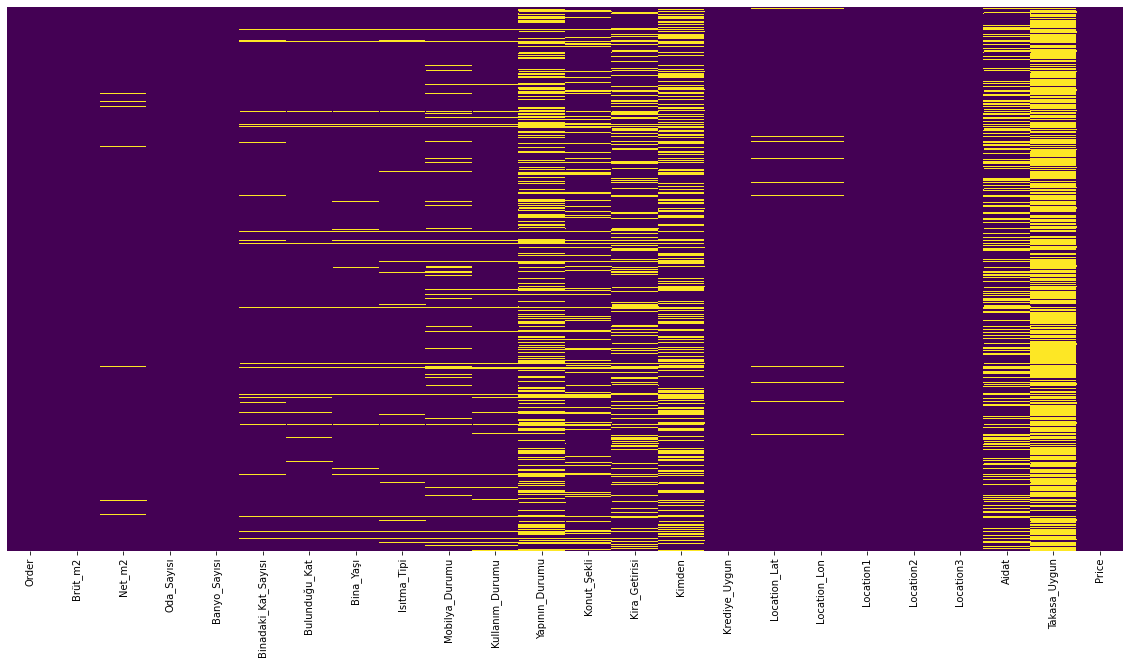

In [98]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")
# When you look at the grap below. You can see that some columns have many missing values.
# So that's why i decided to drop these columns.Working with these columns make no sense.

In [99]:
df.drop(columns = ["Takasa_Uygun","Aidat","Kimden","Yapının_Durumu","Kira_Getirisi","Order"],inplace = True)

<AxesSubplot:>

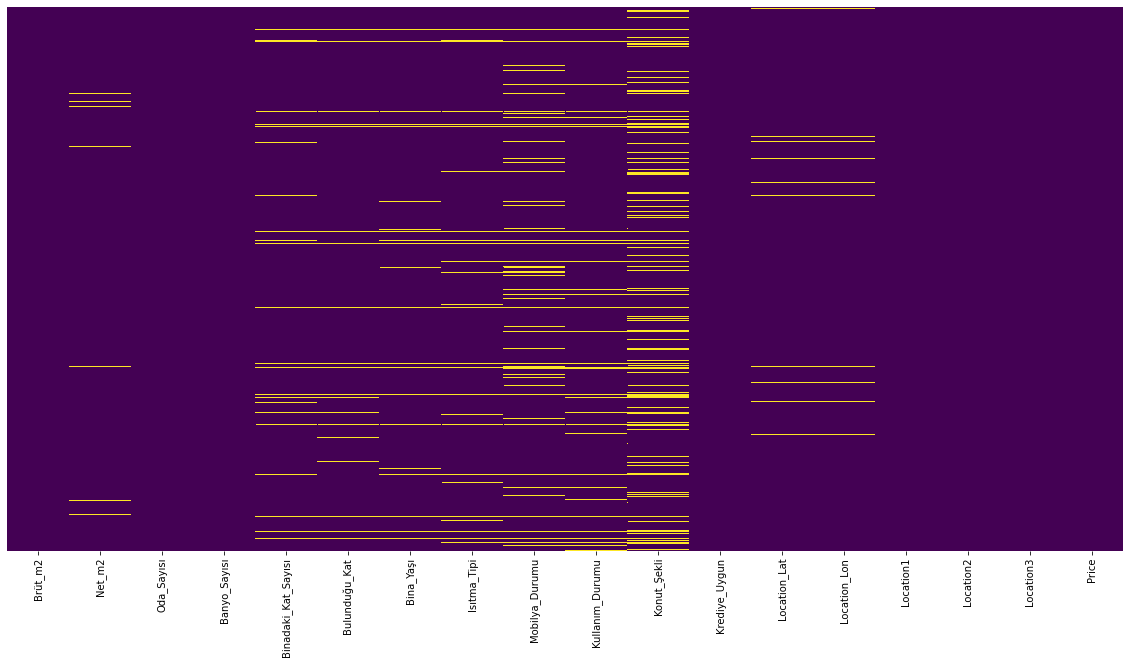

In [100]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis") 
#Now the dataset is suitable for operations. I also dropped  "Order" column because it has no information.

In [101]:
df.drop(columns = ["Location_Lat","Location_Lon"],inplace = True) # I also drop coordiantes columns because i cant work on them for now.
df.drop(columns = ["Bulunduğu_Kat"],inplace = True) # It gives same information with Konut_Şekli feauture.
df.drop(columns = ["Location3"],inplace = True) # This column has same value in every row.
df.drop(columns = ["Kullanım_Durumu"],inplace = True) # I dont think it will affect price of homes.

In [102]:
df.columns

Index(['Brüt_m2', 'Net_m2', 'Oda_Sayısı', 'Banyo_Sayısı',
       'Binadaki_Kat_Sayısı', 'Bina_Yaşı', 'Isıtma_Tipi', 'Mobilya_Durumu',
       'Konut_Şekli', 'Krediye_Uygun', 'Location1', 'Location2', 'Price'],
      dtype='object')

In [103]:
df.dtypes #As you see in the below, We better convert some string values to numeric Bina_Yaşı,Banyo_Sayısı,Oda_Sayısı etc.

Brüt_m2                  int64
Net_m2                 float64
Oda_Sayısı              object
Banyo_Sayısı            object
Binadaki_Kat_Sayısı     object
Bina_Yaşı               object
Isıtma_Tipi             object
Mobilya_Durumu          object
Konut_Şekli             object
Krediye_Uygun           object
Location1               object
Location2               object
Price                    int64
dtype: object

In [104]:
df["Oda_Sayısı"].unique()

array(['3+1', '2+1', '1+1', '2+2', '4+2', '5+1', '4+1', '3+2',
       '10 ve üzeri', '5+2', '6+2', '7+2', '6+1', '4+3', '1+0 (Stüdyo)',
       '5+3', nan, '9+1', '3', '2', '8+4', '7+1'], dtype=object)

In [105]:
df["Oda_Sayısı"].replace(["2+1","3+1","1+1","2+2","4+2","5+1","4+1","3+2","10 ve üzeri","5+2","6+2","7+2","6+1","4+3","1+0 (Stüdyo)","5+3","9+1","8+4","7+1"],
                        [3,4,2,4,6,6,5,5,np.nan,7,8,9,7,7,1,8,10,12,8],inplace = True)

In [106]:
df["Oda_Sayısı"] = pd.to_numeric(df["Oda_Sayısı"],errors = "coerce") # I changed the values in Oda_sayısı column into numeric values.

In [107]:
df["Oda_Sayısı"].dtype    

dtype('float64')

In [108]:
df["Banyo_Sayısı"].unique()

array(['2', '1', '3', '4', '0', '5', nan, '6 ve üzeri'], dtype=object)

In [109]:
df["Banyo_Sayısı"].replace(["6 ve üzeri"],np.nan,inplace = True) # I changed this value into np.nan because I don't want ambiguous values in my model.
df["Banyo_Sayısı"].unique()

array(['2', '1', '3', '4', '0', '5', nan], dtype=object)

In [110]:
df["Banyo_Sayısı"] = pd.to_numeric(df["Banyo_Sayısı"],errors = "coerce")

In [111]:
df["Banyo_Sayısı"].unique() 

array([ 2.,  1.,  3.,  4.,  0.,  5., nan])

In [112]:
df["Binadaki_Kat_Sayısı"].unique()

array(['10-20 arası', '20 ve üzeri', '5', '10', '6', nan, '4', '7', '3',
       '8', '9', '2', '1'], dtype=object)

In [113]:
df["Binadaki_Kat_Sayısı"].replace(["10-20 arası","20 ve üzeri"],["15",np.nan],inplace = True)
df["Binadaki_Kat_Sayısı"] = pd.to_numeric(df["Binadaki_Kat_Sayısı"],errors = "coerce")

In [114]:
df["Binadaki_Kat_Sayısı"].unique()

array([15., nan,  5., 10.,  6.,  4.,  7.,  3.,  8.,  9.,  2.,  1.])

In [115]:
df["Bina_Yaşı"].unique()

array(['0', '6-10 arası', '21-25 arası', nan, '31-35 arası',
       '26-30 arası', '1', '3', '4', '16-20 arası', '11-15 arası',
       '40 ve üzeri', '2', '5', '36-40 arası'], dtype=object)

In [116]:
df["Bina_Yaşı"].replace(["6-10 arası","21-25 arası","31-35 arası","26-30 arası","16-20 arası","11-15 arası","40 ve üzeri","36-40 arası"],
                        [8,23,33,28,18,13,np.nan,38],inplace = True)
df["Bina_Yaşı"] = pd.to_numeric(df["Bina_Yaşı"],errors = "coerce")


In [117]:
df["Bina_Yaşı"].unique()

array([ 0.,  8., 23., nan, 33., 28.,  1.,  3.,  4., 18., 13.,  2.,  5.,
       38.])

In [118]:
df["Isıtma_Tipi"].unique()

array(['Güneş Enerjisi', 'Klima', 'Kombi (Doğalgaz)', nan,
       'Merkezi Sistem (Isı Payı Ölçer)', 'Yok', 'Kalorifer (Doğalgaz)',
       'Soba (Doğalgaz)', 'Merkezi Sistem', 'Yerden Isıtma',
       'Kat Kaloriferi', 'Soba (Kömür)', 'Kalorifer (Akaryakıt)',
       'Fancoil', 'Kombi (Elektrikli)'], dtype=object)

In [119]:
df["Isıtma_Tipi"].replace(["Kombi (Doğalgaz)","Merkezi Sistem (Isı Payı Ölçer)","Kalorifer (Doğalgaz)","Merkezi Sistem","Yerden Isıtma","Kat Kaloriferi"],
                          "Doğalgaz",inplace = True)

df["Isıtma_Tipi"].replace(["Güneş Enerjisi","Klima","Yok","Soba (Doğalgaz)","Soba (Kömür)","Kalorifer (Akaryakıt)","Fancoil","Kombi (Elektrikli)"],
                         "Doğalgaz Yok",inplace = True)

In [120]:
df["Isıtma_Tipi"].unique() # I reduced feature dimensionality in Isıtma_tipi column.

array(['Doğalgaz Yok', 'Doğalgaz', nan], dtype=object)

In [121]:
df["Mobilya_Durumu"].unique()

array([nan, 'Eşyasız', 'Sadece Beyaz Eşya', 'Eşyalı (Mobilyalı)',
       'Sadece Mutfak'], dtype=object)

In [122]:
df["Mobilya_Durumu"].replace(['Sadece Beyaz Eşya','Sadece Beyaz Eşya'],"Kısmi Eşyalı",inplace = True)
df["Mobilya_Durumu"].replace(['Eşyalı (Mobilyalı)'],"Eşyalı",inplace = True)


In [123]:
df["Mobilya_Durumu"].unique()

array([nan, 'Eşyasız', 'Kısmi Eşyalı', 'Eşyalı', 'Sadece Mutfak'],
      dtype=object)

In [124]:
df["Konut_Şekli"].unique()

array([nan, 'Ara Kat', 'Giriş Kat', 'En Üst Kat', 'Çatı Dubleksi',
       'Teras Katı', 'Bahçe Katı', 'Dubleks', 'Ters Dubleks',
       'Ara Dubleks', 'Tripleks', 'Bahçe Dubleksi', 'Fourlex'],
      dtype=object)

In [125]:
df["Konut_Şekli"].replace(['Teras Katı'],"En Üst Kat",inplace = True)

In [126]:
df["Konut_Şekli"].unique()

array([nan, 'Ara Kat', 'Giriş Kat', 'En Üst Kat', 'Çatı Dubleksi',
       'Bahçe Katı', 'Dubleks', 'Ters Dubleks', 'Ara Dubleks', 'Tripleks',
       'Bahçe Dubleksi', 'Fourlex'], dtype=object)

In [127]:
df["Krediye_Uygun"].unique() # No need for feautre engineering, it is already good.

array(['Evet', 'Hayır'], dtype=object)

In [128]:
df.sample(10)

,Brüt_m2,Net_m2,Oda_Sayısı,Banyo_Sayısı,Binadaki_Kat_Sayısı,Bina_Yaşı,Isıtma_Tipi,Mobilya_Durumu,Konut_Şekli,Krediye_Uygun,Location1,Location2,Price
328,110,109.0,4.0,2.0,5.0,0.0,Doğalgaz,Eşyasız,Ara Kat,Evet,İstiklal,Ümraniye,485000
5086,110,90.0,4.0,2.0,5.0,2.0,Doğalgaz,Sadece Mutfak,Ara Kat,Evet,Cumhuriyet,Şişli,1470000
5563,148,147.0,4.0,2.0,5.0,18.0,Doğalgaz,Eşyasız,Çatı Dubleksi,Evet,İstinye,Sarıyer,850000
780,90,89.0,3.0,1.0,5.0,28.0,Doğalgaz,Eşyasız,En Üst Kat,Evet,Soğanlı,Bahçelievler,273000
3508,110,100.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,Hayır,Haseki Sultan,Fatih,550000
7025,80,75.0,3.0,1.0,5.0,28.0,Doğalgaz,Eşyasız,NaN,Hayır,Mimar Sinan,Esenler,189000
5487,85,75.0,3.0,1.0,5.0,8.0,Doğalgaz,Eşyasız,Ara Kat,Evet,Feyzullah,Maltepe,290000
379,130,120.0,3.0,2.0,6.0,0.0,Doğalgaz,NaN,Ara Kat,Evet,Adnan Kahveci,Beylikdüzü,280000
4156,120,110.0,3.0,1.0,5.0,0.0,Doğalgaz,Eşyasız,Giriş Kat,Evet,Ahmet Yesevi,Pendik,258000
2691,90,75.0,3.0,1.0,4.0,4.0,Doğalgaz,Eşyasız,NaN,Hayır,Arnavutköy Merkez,Arnavutköy,185000


In [129]:
df.isna().sum()  

Brüt_m2                   0
Net_m2                   80
Oda_Sayısı                9
Banyo_Sayısı              2
Binadaki_Kat_Sayısı     504
Bina_Yaşı               289
Isıtma_Tipi             299
Mobilya_Durumu          685
Konut_Şekli            1388
Krediye_Uygun             0
Location1                 0
Location2                 0
Price                     0
dtype: int64

In [130]:
ratio =  df["Net_m2"] / df["Brüt_m2"]
ratio2 = ratio.mean() # We can use that ratio to handle with NaN values.
ratio2

0.8938616919139738

In [ ]:
index = df["Net_m2"].index[df["Net_m2"].apply(np.isnan)]
for i in index:
    df["Net_m2"].iloc[i] = df["Brüt_m2"].iloc[i] *ratio2
                                                              # I replaced NaN values in Net_m2 column with Brüt_m2 * ratio2

In [132]:
df["Net_m2"].isna().sum()

0

In [133]:
df.dropna(axis = 0, subset = ["Oda_Sayısı","Banyo_Sayısı"],inplace = True) # I dropped NaN values in these columns.They are few.
# I dont think this will affect the model.


In [134]:
df.shape

(7029, 13)

In [135]:
df["Bina_Yaşı"].fillna(df["Bina_Yaşı"].mean(),inplace = True)

In [136]:
df["Isıtma_Tipi"].fillna("Doğalgaz",inplace = True)

In [137]:
df["Mobilya_Durumu"].fillna("Eşyasız",inplace = True)

In [138]:
df["Konut_Şekli"].fillna("Ara Kat",inplace = True)

In [139]:
df["Binadaki_Kat_Sayısı"].mean()

6.132986057913283

In [140]:
df["Binadaki_Kat_Sayısı"].fillna(round(df["Binadaki_Kat_Sayısı"].mean()),inplace = True)


In [141]:
df.isna().sum()  #After a few operations, i cleaned dataset from missing values

Brüt_m2                0
Net_m2                 0
Oda_Sayısı             0
Banyo_Sayısı           0
Binadaki_Kat_Sayısı    0
Bina_Yaşı              0
Isıtma_Tipi            0
Mobilya_Durumu         0
Konut_Şekli            0
Krediye_Uygun          0
Location1              0
Location2              0
Price                  0
dtype: int64

In [142]:
df.dtypes

Brüt_m2                  int64
Net_m2                 float64
Oda_Sayısı             float64
Banyo_Sayısı           float64
Binadaki_Kat_Sayısı    float64
Bina_Yaşı              float64
Isıtma_Tipi             object
Mobilya_Durumu          object
Konut_Şekli             object
Krediye_Uygun           object
Location1               object
Location2               object
Price                    int64
dtype: object

In [143]:
categorical_columns = ["Isıtma_Tipi","Mobilya_Durumu","Konut_Şekli","Krediye_Uygun"] # I didnt take location features for now.


for i in categorical_columns:
    print("Unique values for {} column : {}\n".format(i,df[i].unique()))

Unique values for Isıtma_Tipi column : ['Doğalgaz Yok' 'Doğalgaz']

Unique values for Mobilya_Durumu column : ['Eşyasız' 'Kısmi Eşyalı' 'Eşyalı' 'Sadece Mutfak']

Unique values for Konut_Şekli column : ['Ara Kat' 'Giriş Kat' 'En Üst Kat' 'Çatı Dubleksi' 'Bahçe Katı' 'Dubleks'
 'Ters Dubleks' 'Ara Dubleks' 'Tripleks' 'Bahçe Dubleksi' 'Fourlex']

Unique values for Krediye_Uygun column : ['Evet' 'Hayır']



In [144]:
df["Isıtma_Tipi"].replace({
    "Doğalgaz" : 1,
    "Doğalgaz Yok" : 0
},inplace = True)

df["Krediye_Uygun"].replace({  
    "Evet" : 1,
    "Hayır" : 0
},inplace = True)                         #I convert string values into integer paramaters. I will use one hot enconding for 
                                          # other categorical features.

# Outlier Detection

In [145]:
df[df["Net_m2"]>df["Brüt_m2"]] # As you see in the below, there are some values which its Netm2 is greaten its Brütm2
                                # That is impossible, that's why i drop these rows.

,Brüt_m2,Net_m2,Oda_Sayısı,Banyo_Sayısı,Binadaki_Kat_Sayısı,Bina_Yaşı,Isıtma_Tipi,Mobilya_Durumu,Konut_Şekli,Krediye_Uygun,Location1,Location2,Price
716,85,90.0,3.0,1.0,5.0,3.000000,1,Eşyasız,Ara Kat,1,Namık Kemal,Esenyurt,255000
750,110,117.0,3.0,1.0,6.0,0.000000,1,Eşyasız,Ara Kat,1,Yenikent,Esenyurt,115000
1236,70,75.0,2.0,1.0,4.0,8.000000,1,Eşyasız,Ara Kat,1,Mimaroba,Büyükçekmece,310000
2237,75,85.0,3.0,1.0,5.0,4.000000,1,Eşyasız,Giriş Kat,1,75. Yıl,Sultangazi,188000
3402,95,100.0,3.0,1.0,4.0,0.000000,1,Eşyasız,Ara Kat,1,Beylikdüzü OSB,Beylikdüzü,229000
4053,80,90.0,3.0,1.0,4.0,18.000000,1,Eşyasız,Giriş Kat,0,Çırpıcı,Zeytinburnu,269000
5920,90,94.0,3.0,1.0,4.0,33.000000,1,Eşyasız,Ara Kat,1,Seyyid Ömer,Fatih,410000
6281,80,81.0,3.0,1.0,4.0,6.322949,1,Eşyasız,Bahçe Katı,1,Cennet,Küçükçekmece,175000
6954,95,100.0,3.0,1.0,4.0,0.000000,1,Eşyasız,Ara Kat,1,Beylikdüzü OSB,Beylikdüzü,188000


In [146]:
df2 = df[df["Net_m2"]<=df["Brüt_m2"]]
df2.shape

(7020, 13)

In [147]:
df2[df2["Banyo_Sayısı"] == 0] # there can't be a house without bathroom.


,Brüt_m2,Net_m2,Oda_Sayısı,Banyo_Sayısı,Binadaki_Kat_Sayısı,Bina_Yaşı,Isıtma_Tipi,Mobilya_Durumu,Konut_Şekli,Krediye_Uygun,Location1,Location2,Price
416,120,109.000000,3.0,0.0,5.0,0.0,1,Eşyasız,Ara Kat,1,Saadetdere,Esenyurt,170000
435,142,141.000000,4.0,0.0,2.0,0.0,1,Eşyasız,Ara Kat,1,Mustafa Kemal Paşa,Avcılar,235000
891,110,100.000000,3.0,0.0,5.0,0.0,1,Eşyasız,Bahçe Katı,1,Cumhuriyet,Beylikdüzü,113000
1113,100,90.000000,3.0,0.0,5.0,0.0,1,Eşyasız,Ara Kat,1,Cumhuriyet,Beylikdüzü,295000
1652,85,80.000000,3.0,0.0,5.0,0.0,1,Eşyasız,Ara Kat,1,Esentepe,Sultangazi,260000
1697,110,105.000000,3.0,0.0,5.0,0.0,1,Eşyasız,Ara Kat,1,Cihangir,Avcılar,140000
1854,105,95.000000,3.0,0.0,5.0,0.0,1,Eşyasız,Giriş Kat,1,Balıkyolu,Esenyurt,130000
1965,207,190.000000,4.0,0.0,4.0,0.0,1,Eşyasız,Ara Kat,1,Levazım,Beşiktaş,10500000
2811,130,120.000000,4.0,0.0,5.0,0.0,1,Eşyasız,Ara Kat,1,Kavaklı,Beylikdüzü,265000
2860,85,75.000000,2.0,0.0,10.0,1.0,1,Eşyasız,Ara Kat,1,Adnan Kahveci,Beylikdüzü,200000


In [148]:
df3 = df2[df2["Banyo_Sayısı"] != 0]
df3.shape

(6995, 13)

In [149]:
df3.describe() #As you see, there are some extreme valuess in Net_m2 column. There cant be a net_m2 like 120105 or 1 m2.


,Brüt_m2,Net_m2,Oda_Sayısı,Banyo_Sayısı,Binadaki_Kat_Sayısı,Bina_Yaşı,Isıtma_Tipi,Krediye_Uygun,Price
count,6995.000000,6995.000000,6995.000000,6995.000000,6995.000000,6995.000000,6995.000000,6995.000000,6.995000e+03
mean,142.509650,128.321428,3.604146,1.427019,6.128520,6.332621,0.933953,0.867048,5.847100e+05
std,1435.673375,1435.388123,1.046863,0.605887,3.289037,8.891749,0.248382,0.339547,1.059682e+06
min,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,4.500000e+04
25%,90.000000,85.000000,3.000000,1.000000,4.000000,0.000000,1.000000,1.000000,2.450000e+05
50%,112.000000,100.000000,3.000000,1.000000,5.000000,2.000000,1.000000,1.000000,3.500000e+05
75%,145.000000,130.000000,4.000000,2.000000,6.000000,8.000000,1.000000,1.000000,5.500000e+05
max,120105.000000,120104.000000,12.000000,5.000000,15.000000,38.000000,1.000000,1.000000,2.700000e+07


In [150]:
df4 = df3[(df3["Net_m2"]>15) & (df3["Net_m2"]<450)]  # I will take the homes which its net_m2 in this interval.
df4.shape

(6970, 13)

In [ ]:
df4[df["Banyo_Sayısı"] > df["Oda_Sayısı"]] # I decided to drop the rows which its Bathroom number is greater than its room number.

In [ ]:
df5 = df4[df["Banyo_Sayısı"] < df["Oda_Sayısı"]]
df5.shape

In [153]:
df5

,Brüt_m2,Net_m2,Oda_Sayısı,Banyo_Sayısı,Binadaki_Kat_Sayısı,Bina_Yaşı,Isıtma_Tipi,Mobilya_Durumu,Konut_Şekli,Krediye_Uygun,Location1,Location2,Price
0,122,121.0,4.0,2.0,15.0,0.000000,0,Eşyasız,Ara Kat,1,Eski Habipler,Sultangazi,610000
1,127,100.0,3.0,2.0,6.0,0.000000,0,Eşyasız,Ara Kat,0,Kayabaşı,Başakşehir,775000
2,130,129.0,3.0,2.0,5.0,8.000000,0,Kısmi Eşyalı,Ara Kat,1,Atakent,Küçükçekmece,630000
3,125,95.0,4.0,2.0,10.0,0.000000,1,Eşyasız,Ara Kat,1,Sahrayı Cedit,Kadıköy,665000
4,120,115.0,4.0,1.0,5.0,0.000000,1,Eşyasız,Giriş Kat,1,Beylikdüzü OSB,Beylikdüzü,142000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7034,100,92.0,3.0,1.0,4.0,0.000000,1,Eşyasız,Ara Kat,1,Emek,Sancaktepe,249000
7035,100,90.0,3.0,1.0,3.0,6.322949,1,Sadece Mutfak,Ara Kat,1,Göktürk Merkez,Eyüpsultan,530000
7036,115,85.0,3.0,1.0,9.0,18.000000,1,Eşyasız,Ara Kat,1,Suadiye,Kadıköy,615000
7037,96,95.0,3.0,2.0,15.0,2.000000,1,Eşyasız,Ara Kat,0,Bahçeşehir 1. Kısım,Başakşehir,345000


<AxesSubplot:xlabel='Location2', ylabel='Price'>

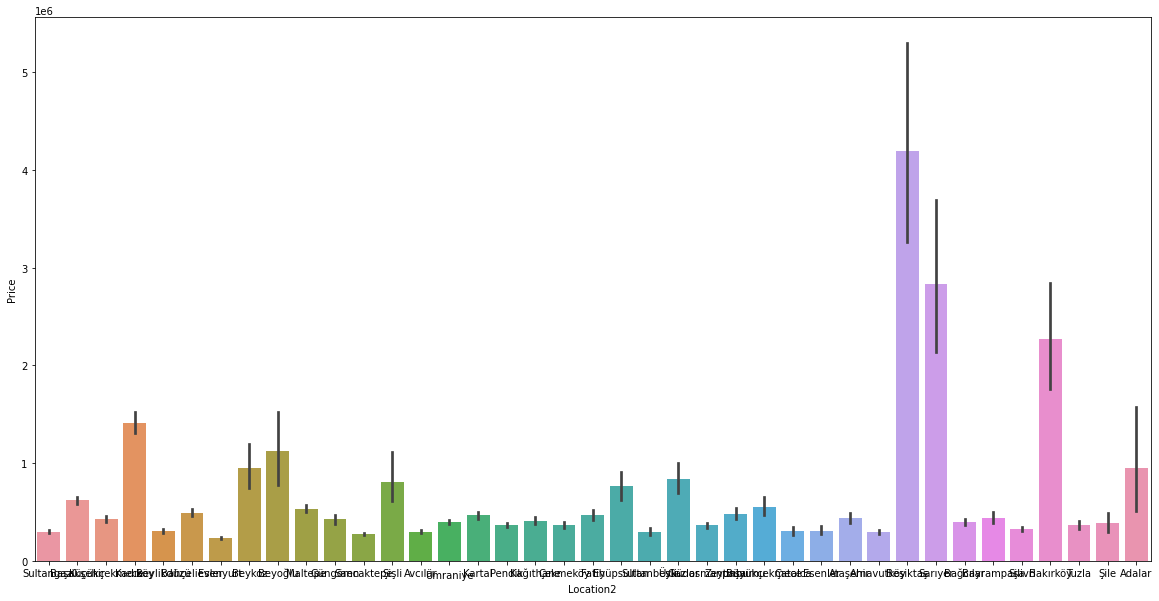

In [154]:
sns.barplot(x=df5["Location2"],y = df5["Price"],estimator =np.mean, data = df) # I wanted to see meean prices according to location2

In [ ]:
df5["Location"] = df5["Location1"] + " " + df5["Location2"] # Combining Location2 and Location1 columns into one column to 
                                                            # examine outliers according to location features better.
df5.head()

In [ ]:
df5["Price_Per_M2"] = df5["Price"] / df5["Net_m2"]  # Created this column to do some statistical approach.
df5.head()

In [70]:
location_stats = df5["Location"].value_counts(ascending = False)
location_stats

Kayabaşı Başakşehir              193
Cumhuriyet Beylikdüzü            139
Yakuplu Beylikdüzü               108
Mustafa Kemal Paşa Avcılar       102
Suadiye Kadıköy                  100
                                ... 
Gümüşsuyu Beykoz                   1
Mithatpaşa Eyüpsultan              1
Ataköy 3-4-11. Kısım Bakırköy      1
Koşuyolu Kadıköy                   1
Fatih Sultanbeyli                  1
Name: Location, Length: 608, dtype: int64

In [71]:
location_stats_bigger_than_20 = location_stats[location_stats>20]
location_stats_bigger_than_20            # I take the location which its frequency is greater than 20 to do statisctical outlier detection.

Kayabaşı Başakşehir              193
Cumhuriyet Beylikdüzü            139
Yakuplu Beylikdüzü               108
Mustafa Kemal Paşa Avcılar       102
Suadiye Kadıköy                  100
                                ... 
Kocasinan Merkez Bahçelievler     21
Çeliktepe Kağıthane               21
15 Temmuz Bağcılar                21
Hürriyet Kartal                   21
Sultançiftliği Çekmeköy           21
Name: Location, Length: 85, dtype: int64

In [ ]:
for i in location_stats_bigger_than_20.keys():
    
    dx = df5[df5["Location"] == i]
    for j in  dx[(dx["Price_Per_M2"] < dx["Price_Per_M2"].quantile(0.002)) | (dx["Price_Per_M2"] > dx["Price_Per_M2"].quantile(0.998))].index:
        df5.drop(index = j,axis = 0,inplace = True)
        
df5.shape       # I dropped homes which is outside of this range. 

In [73]:
df6 = df5.drop(columns = ["Brüt_m2","Location","Price_Per_M2"]) # No need for these columns anymore. I also dropped Brütm2
                                                                # because it is high correlated with Net_m2.
df6.head()

,Net_m2,Oda_Sayısı,Banyo_Sayısı,Binadaki_Kat_Sayısı,Bina_Yaşı,Isıtma_Tipi,Mobilya_Durumu,Konut_Şekli,Krediye_Uygun,Location1,Location2,Price
0,121.0,4.0,2.0,15.0,0.0,0,Eşyasız,Ara Kat,1,Eski Habipler,Sultangazi,610000
1,100.0,3.0,2.0,6.0,0.0,0,Eşyasız,Ara Kat,0,Kayabaşı,Başakşehir,775000
2,129.0,3.0,2.0,5.0,8.0,0,Kısmi Eşyalı,Ara Kat,1,Atakent,Küçükçekmece,630000
3,95.0,4.0,2.0,10.0,0.0,1,Eşyasız,Ara Kat,1,Sahrayı Cedit,Kadıköy,665000
4,115.0,4.0,1.0,5.0,0.0,1,Eşyasız,Giriş Kat,1,Beylikdüzü OSB,Beylikdüzü,142000


In [74]:
df7 = pd.get_dummies(df6,columns = ["Location1","Location2","Mobilya_Durumu","Konut_Şekli"],drop_first = True)
# Encoding for caterogial features.

In [75]:
df7.head() # The dataset is ready.

,Net_m2,Oda_Sayısı,Banyo_Sayısı,Binadaki_Kat_Sayısı,Bina_Yaşı,Isıtma_Tipi,Krediye_Uygun,Price,Location1_15 Temmuz,Location1_19 Mayıs,...,Konut_Şekli_Ara Kat,Konut_Şekli_Bahçe Dubleksi,Konut_Şekli_Bahçe Katı,Konut_Şekli_Dubleks,Konut_Şekli_En Üst Kat,Konut_Şekli_Fourlex,Konut_Şekli_Giriş Kat,Konut_Şekli_Ters Dubleks,Konut_Şekli_Tripleks,Konut_Şekli_Çatı Dubleksi
0,121.0,4.0,2.0,15.0,0.0,0,1,610000,0,0,...,1,0,0,0,0,0,0,0,0,0
1,100.0,3.0,2.0,6.0,0.0,0,0,775000,0,0,...,1,0,0,0,0,0,0,0,0,0
2,129.0,3.0,2.0,5.0,8.0,0,1,630000,0,0,...,1,0,0,0,0,0,0,0,0,0
3,95.0,4.0,2.0,10.0,0.0,1,1,665000,0,0,...,1,0,0,0,0,0,0,0,0,0
4,115.0,4.0,1.0,5.0,0.0,1,1,142000,0,0,...,0,0,0,0,0,0,1,0,0,0


In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df7[["Net_m2","Oda_Sayısı","Banyo_Sayısı","Binadaki_Kat_Sayısı","Bina_Yaşı"]] = scaler.fit_transform(df7[["Net_m2","Oda_Sayısı","Banyo_Sayısı","Binadaki_Kat_Sayısı","Bina_Yaşı"]])
# Scaling values.

In [77]:
df7.head()

,Net_m2,Oda_Sayısı,Banyo_Sayısı,Binadaki_Kat_Sayısı,Bina_Yaşı,Isıtma_Tipi,Krediye_Uygun,Price,Location1_15 Temmuz,Location1_19 Mayıs,...,Konut_Şekli_Ara Kat,Konut_Şekli_Bahçe Dubleksi,Konut_Şekli_Bahçe Katı,Konut_Şekli_Dubleks,Konut_Şekli_En Üst Kat,Konut_Şekli_Fourlex,Konut_Şekli_Giriş Kat,Konut_Şekli_Ters Dubleks,Konut_Şekli_Tripleks,Konut_Şekli_Çatı Dubleksi
0,0.222749,0.2,0.25,1.000000,0.000000,0,1,610000,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0.172986,0.1,0.25,0.357143,0.000000,0,0,775000,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0.241706,0.1,0.25,0.285714,0.210526,0,1,630000,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0.161137,0.2,0.25,0.642857,0.000000,1,1,665000,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0.208531,0.2,0.00,0.285714,0.000000,1,1,142000,0,0,...,0,0,0,0,0,0,1,0,0,0


In [78]:
df7.shape

(6753, 539)

# Prediction with RandomForestRegressor

In [157]:
df8 = df7.sample(6000,random_state = 60)

In [158]:
X = df8.drop("Price",axis = 1)
y = df8["Price"]
                                                 #Creating dependent and independent variables.

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) 

In [201]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [4,6,8]
# Minimum number of samples required to split a node
min_samples_split = [2,4]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [202]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 
               'bootstrap': bootstrap}


In [161]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()                  # I decided to use randomforestregressor for my model.
                                                    # I think it s useful when you have many feautures.


In [204]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [205]:
rf_Grid.fit(X_train, y_train)         #Grid Search for best parameters

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [4, 6, 8],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [206]:
rf_Grid.best_params_


{'bootstrap': True,
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 80}

In [162]:
regressor1 = RandomForestRegressor(bootstrap = True,
 max_depth =  8,
 max_features = 'auto',
 min_samples_leaf = 2,
 min_samples_split = 4,
 n_estimators =  80,)

In [163]:
regressor1.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=2, min_samples_split=4,
                      n_estimators=80)

In [164]:
pred = regressor1.predict(X_test)

In [165]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [166]:
print("Test data Scores\nR2 score for Random Forest on data: {}\nMean Squared Error for Random Forest on data: {}\nMean Absolute Error for Random Forest on data: {}".format(r2_score(y_test,pred),mean_squared_error(y_test,pred),mean_absolute_error(y_test,pred)))

Test data Scores
R2 score for Random Forest on data: 0.831209230213787
Mean Squared Error for Random Forest on data: 216278345107.65314
Mean Absolute Error for Random Forest on data: 193404.0383796592


In [167]:
pred2 = regressor1.predict(X_train)

In [168]:
print("Training Data Scores\nR2 score for Random Forest on data: {}\nMean Squared Error for Random Forest on data: {}\nMean Absolute Error for Random Forest on data: {}".format(r2_score(y_train,pred2),mean_squared_error(y_train,pred2),mean_absolute_error(y_train,pred2)))

Training Data Scores
R2 score for Random Forest on data: 0.8517219774334169
Mean Squared Error for Random Forest on data: 159573952103.00516
Mean Absolute Error for Random Forest on data: 179061.92837326074


In [214]:
#No overfitting.That's great.

In [169]:
results1 = regressor1.predict(X_test)


In [170]:
predicted_results = []                                         
for i in range(len(results1)):
    predicted_results.append(results1[i])
test_results = []                                           #Comparing the results  #Some results looks perfect.But
                                                            #Some of them are pretty bad. I think there is no enough information
                                                            # to predict price.
for i in range(len(results1)):
    test_results.append(y_test.values[i])
    
for i in range(len(predicted_results)):
    print("Predicted price : {} Real Price : {}".format(predicted_results[i].round(),test_results[i]))

Predicted price : 748128.0 Real Price : 525000
Predicted price : 295973.0 Real Price : 455000
Predicted price : 864495.0 Real Price : 470000
Predicted price : 744122.0 Real Price : 415000
Predicted price : 756640.0 Real Price : 1399000
Predicted price : 288933.0 Real Price : 299000
Predicted price : 654864.0 Real Price : 400000
Predicted price : 288933.0 Real Price : 155000
Predicted price : 288933.0 Real Price : 135000
Predicted price : 288933.0 Real Price : 255000
Predicted price : 288933.0 Real Price : 289000
Predicted price : 403812.0 Real Price : 480000
Predicted price : 1448457.0 Real Price : 1780000
Predicted price : 613132.0 Real Price : 999999
Predicted price : 501556.0 Real Price : 630000
Predicted price : 472190.0 Real Price : 555000
Predicted price : 398980.0 Real Price : 435000
Predicted price : 403224.0 Real Price : 328000
Predicted price : 748128.0 Real Price : 525000
Predicted price : 288933.0 Real Price : 370000
Predicted price : 746672.0 Real Price : 749900
Predicted 

# Prediction With ANN

In [171]:
import tensorflow as tf
from tensorflow import keras

In [172]:
df8.shape      # 538 feature columns

(6000, 539)

In [ ]:
modeld = keras.Sequential([
    keras.layers.Dense(538,input_dim=538,activation="relu"),
    keras.layers.Dense(200,activation = "relu"),
    keras.layers.Dense(100,activation = "relu"),
    keras.layers.Dense(1, activation='relu')
])

modeld.compile(loss="mse", optimizer='adam', metrics=["mae"])

modeld.fit(X_train, y_train, epochs=100,batch_size = 50)

Epoch 1/100
96/96 [==============================] - 1s 4ms/step - loss: 1416310947840.0000 - mae: 583112.1250
Epoch 2/100
96/96 [==============================] - 0s 4ms/step - loss: 1297707040768.0000 - mae: 468213.7188
Epoch 3/100
96/96 [==============================] - 0s 4ms/step - loss: 1053612834816.0000 - mae: 375728.0938
Epoch 4/100
96/96 [==============================] - 0s 4ms/step - loss: 994622177280.0000 - mae: 383539.2500
Epoch 5/100
96/96 [==============================] - 0s 4ms/step - loss: 941958823936.0000 - mae: 366167.4062
Epoch 6/100
96/96 [==============================] - 0s 5ms/step - loss: 880789946368.0000 - mae: 333945.0312
Epoch 7/100
96/96 [==============================] - 0s 5ms/step - loss: 814694334464.0000 - mae: 300106.4688
Epoch 8/100
96/96 [==============================] - 0s 4ms/step - loss: 755426000896.0000 - mae: 287643.2812A: 0s - loss: 984359239680.0000 - mae: 308419.37
Epoch 9/100
96/96 [==============================] - 0s 4ms/step - lo

In [296]:
y_pred5 = modeld.predict(X_test)
y_pred6 = modeld.predict(X_train)

In [297]:
print("Test data Scores\nR2 score for ANN on data: {}\nMean Squared Error for ANN on data: {}\nMean Absolute Error for ANN on data: {}".format(r2_score(y_test,y_pred5),mean_squared_error(y_test,y_pred5),mean_absolute_error(y_test,y_pred5)))

Test data Scores
R2 score for ANN on data: 0.6830892433585081
Mean Squared Error for ANN on data: 406070391645.51874
Mean Absolute Error for ANN on data: 169348.10221354166


In [298]:
print("Training Data Scores\nR2 score for ANN on data: {}\nMean Squared Error for ANN on data: {}\nMean Absolute Error for ANN on data: {}".format(r2_score(y_train,y_pred6),mean_squared_error(y_train,y_pred6),mean_absolute_error(y_train,y_pred6)))

Training Data Scores
R2 score for ANN on data: 0.8223116970965676
Mean Squared Error for ANN on data: 191224729369.75046
Mean Absolute Error for ANN on data: 126897.21540201824


In [299]:
results = modeld.predict(X_test)


In [300]:
predicted_results = []                                         
for i in range(len(results)):
    predicted_results.append(results[i][0])
test_results = []                                             
for i in range(len(results)):
    test_results.append(y_test.values[i])  #comparing the results
    
for i in range(len(predicted_results)):
    print("Predicted price : {} Real Price : {}".format(predicted_results[i].round(),test_results[i]))

Predicted price : 683706.0 Real Price : 525000
Predicted price : 414135.0 Real Price : 455000
Predicted price : 778448.0 Real Price : 470000
Predicted price : 471137.0 Real Price : 415000
Predicted price : 1777387.0 Real Price : 1399000
Predicted price : 344761.0 Real Price : 299000
Predicted price : 540258.0 Real Price : 400000
Predicted price : 111808.0 Real Price : 155000
Predicted price : 113856.0 Real Price : 135000
Predicted price : 273645.0 Real Price : 255000
Predicted price : 271766.0 Real Price : 289000
Predicted price : 460795.0 Real Price : 480000
Predicted price : 1565728.0 Real Price : 1780000
Predicted price : 927895.0 Real Price : 999999
Predicted price : 834363.0 Real Price : 630000
Predicted price : 523888.0 Real Price : 555000
Predicted price : 369675.0 Real Price : 435000
Predicted price : 193543.0 Real Price : 328000
Predicted price : 651462.0 Real Price : 525000
Predicted price : 325699.0 Real Price : 370000
Predicted price : 713420.0 Real Price : 749900
Predicted